# 『ウェブ最適化ではじめる機械学習』の写経

In [4]:
import os
import sys

sys.path.append(os.path.join('../.venv/Lib/site-packages/'))

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import pymc3 as pm

## Chap. 6 contextual bandit

### Logistic Thompson Sampling

In [6]:
arms = [[0,0], [0,1], [1,0], [1,1]]

In [19]:
class MCMC_GLMTSAgent(object):
    def __init__(self):
        self.counts = [0 for _ in arms]
        self.wins = [0 for _ in arms]
        self.phis = np.array([[arm[0], arm[1], 1] for arm in arms]).T
        
    def get_arm(self):
        if 0 in self.counts: return self.counts.index(0)
        with pm.Model() as model:
            w = pm.Normal('w', mu=0, sigma=10, shape=3)
            linpred = pm.math.dot(w, self.phis)
            theta = pm.Deterministic(
                'theta', 1/(1+pm.math.exp(linpred))
            )
            obs = pm.Binomial(
                'obs', n=self.counts, p=theta, observed=self.wins
            )
            trace = pm.sample(2000, chains=1)
        sample = pm.sample_posterior_predictive(
            trace, samples=1, model=model, vars=[theta]
        )
        return np.argmax(sample['theta'])
    
    def sample(self, arm_index, reward):
        self.counts[arm_index] += 1
        self.wins[arm_index] += reward

In [20]:
# 環境の設定
class Env(object):
    def p(arm):
        x = arm[0]*0.2 + arm[1]*0.8 - 4
        return 1 / (1+np.exp(-x))
    
    def react(arm):
        return 1 if np.random.random() < Env.p(arm) else 0
    
    def opt():
        return np.argmax([Env.p(arm) for arm in arms])

In [21]:
# simulation
np.random.seed(0)
selected_arms = []
earned_rewards = []
n_step = 20
agent = MCMC_GLMTSAgent()
for step in range(n_step):
    arm_index = agent.get_arm()
    for _ in range(50):
        reward = Env.react(arms[arm_index])
        agent.sample(arm_index, reward)
        selected_arms.append(arm_index)
        earned_rewards.append(reward)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 12 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
C:\Users\EINOSUKEIIDA\Anaconda3\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 14 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
C:\Users\EINOSUKEIIDA\Anaconda3\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 16 seconds.
The acceptance probability does not match the target. It is 0.8938103760188965, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 17 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 18 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 17 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 19 seconds.
The acceptance probability does not match the target. It is 0.8938440886736164, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 17 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 19 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 21 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 18 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7098985079296495, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 25 seconds.
The acceptance probability does not match the target. It is 0.8942424877421691, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 22 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 23 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 19 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 20 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [22]:
from collections import Counter

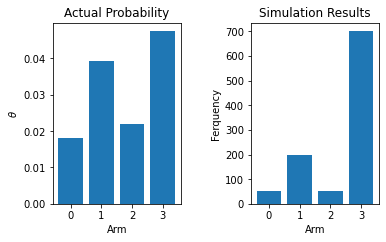

In [24]:
arm_count = [row[1] for row in sorted(Counter(selected_arms).items())]
plt.subplot(1,2,1)
plt.bar(range(4), [Env.p(arm) for arm in arms], tick_label=range(4))
plt.xlabel('Arm')
plt.ylabel(r'$\theta$')
plt.title('Actual Probability')
plt.subplot(1,2,2)
plt.bar(range(4), arm_count, tick_label=range(4))
plt.xlabel('Arm')
plt.ylabel('Ferquency')
plt.title('Simulation Results')
plt.tight_layout(pad=3)
plt.show()

### Lin UCB

In [25]:
class LinUCBAgent(object):
    def __init__(self):
        self.phis = np.array([[arm[0], arm[1], 1] for arm in arms]).T
        self.alpha = 1
        self.sigma = 1
        self.A = np.identity(self.phis.shape[0])
        self.b = np.zeros((self.phis.shape[0],1))
        
    def get_arm(self):
        inv_A = np.linalg.inv(self.A)
        mu = inv_A.dot(self.b)
        S = inv_A
        pred_mean = self.phis.T.dot(mu)
        pred_var = self.phis.T.dot(S).dot(self.phis)
        ucb = pred_mean.T + self.alpha * np.sqrt(np.diag(pred_var))
        return np.argmax(ucb)
    
    def sample(self, arm_index, reward):
        phi = self.phis[:, [arm_index]]
        self.b += phi * reward / (self.sigma ** 2)
        self.A += phi.dot(phi.T) / (self.sigma ** 2)

In [28]:
n_iter = 500
n_step = 5000
selected_arms = np.zeros((n_iter, n_step), dtype=int)
earned_rewards = np.zeros((n_iter, n_step), dtype=int)
for it in range(n_iter):
    agent = LinUCBAgent()
    for step in range(n_step):
        arm_index = agent.get_arm()
        reward = Env.react(arms[arm_index])
        agent.sample(arm_index, reward)
        selected_arms[it, step] = arm_index
        earned_rewards[it, step] = reward

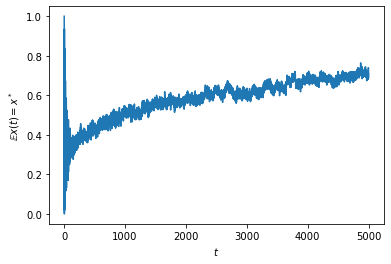

In [29]:
plt.plot(np.mean(selected_arms==Env.opt(), axis=0))
plt.xlabel(r'$t$')
plt.ylabel(r'$\mathbb{E}{x(t) = x^*}$')
plt.show()